## 1.Import Necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

## 2.Load and Explore Dataset

In [ ]:
# Load and Explore Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## 3.Display the Dataset

In [ ]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## 4. Describe the information of a Dataset

In [ ]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

## 5. Check for duplicate values

In [ ]:

# Check for duplicate values
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## 6.Check for null values

In [ ]:
# Check for null values
null_values = df.isnull().sum()
print("Missing values per column:\n", null_values)

Missing values per column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## 7.Check for missing values in the dataset

In [ ]:

# Check for missing values in the dataset
missing_values = df.isna().sum().sum()
print(f"Total missing values in dataset: {missing_values}")

Total missing values in dataset: 0


## 8.If missing values found, fill them with the mean

In [ ]:
# If missing values found, fill them with the mean
if missing_values > 0:
    df.fillna(df.mean(), inplace=True)
    print("Missing values filled with column mean.")


## 9.Visualize the dataset before training

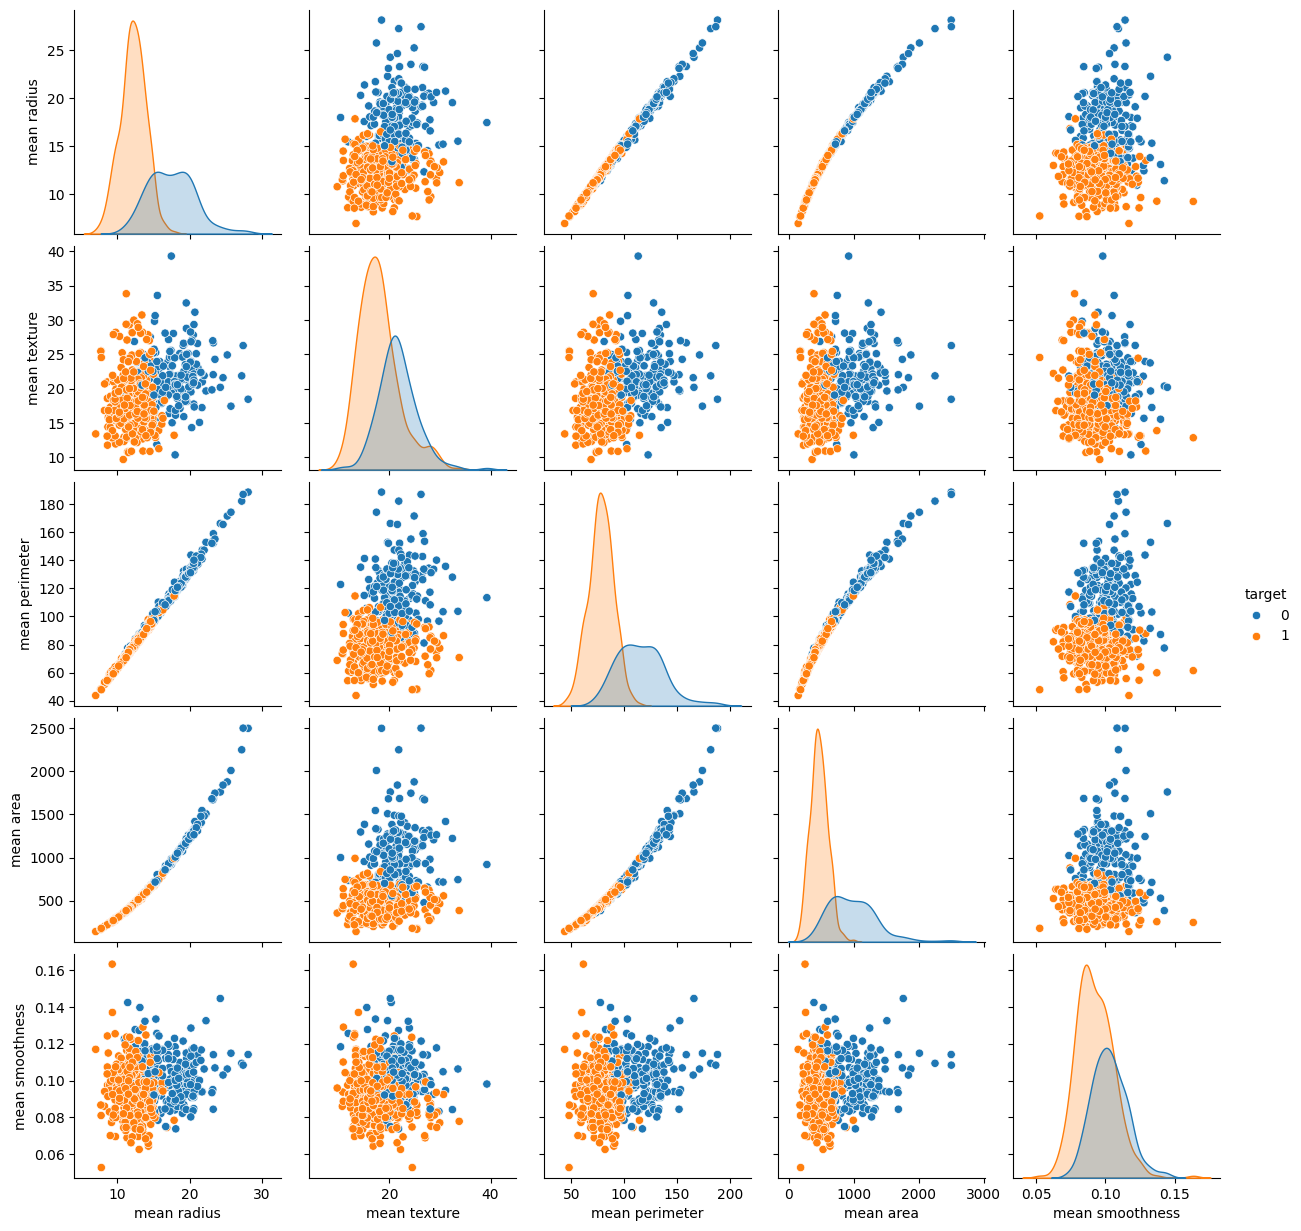

In [ ]:
# Visualize the dataset before training
sns.pairplot(df, hue='target', vars=df.columns[:5])
plt.show()

## 10.Stratified Sampling

In [ ]:
# Stratified Sampling
y = df['target']
X = df.drop(columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 11. Data Preprocessing (Standardization)

In [ ]:
# Data Preprocessing (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 12.Apply PCA for Dimensionality Reduction (Retain 95% variance)
## PCA
data, allowing for effective data representation in fewer dimensions.
PCA is a technique to reduce the number of features while keeping the most important information, helping with dimensionality reduction.
## 16. Advantages of PCA
Reduces complexity and computation time

Removes noise and redundancy

Helps in visualization of high-dimensional data

## 17. Disadvantages of PCA
Can lose important information

Hard to interpret transformed features

Works best with linear relationships

In [ ]:
# Apply PCA for Dimensionality Reduction (Retain 95% variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## 13.Train SVM Classifier  
SVM (Support Vector Machine) is a machine learning algorithm used for classification and regression. It finds the best boundary (hyperplane) to separate different classes.
## Kernal
Kernels help SVM handle non-linear data by transforming it into a higher dimension where it becomes separable.
## Linear Kernel
A simple kernel used when the data is linearly separable (i.e., can be separated by a straight line)

In [ ]:
# Train SVM Classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train_pca, y_train)

SVC(kernel='linear', probability=True, random_state=42)

## Hyperplane
A hyperplane is a decision boundary that separates data into different classes in an SVM model.



In [ ]:
# Get the hyperplane and margin
w = svm_clf.coef_[0]  # Weights
b = svm_clf.intercept_[0]  # Bias

In [ ]:
# Plot the decision boundary
x_vals = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 100)
y_vals = -(w[0] / w[1]) * x_vals - b / w[1]  # Equation of hyperplane

In [ ]:
# Plot margins
margin = 1 / np.sqrt(np.sum(svm_clf.coef_ ** 2))  # Margin width
y_vals_margin1 = y_vals + margin
y_vals_margin2 = y_vals - margin

## Margin
The margin is the distance between the hyperplane and the closest support vectors. A larger margin means better generalization.

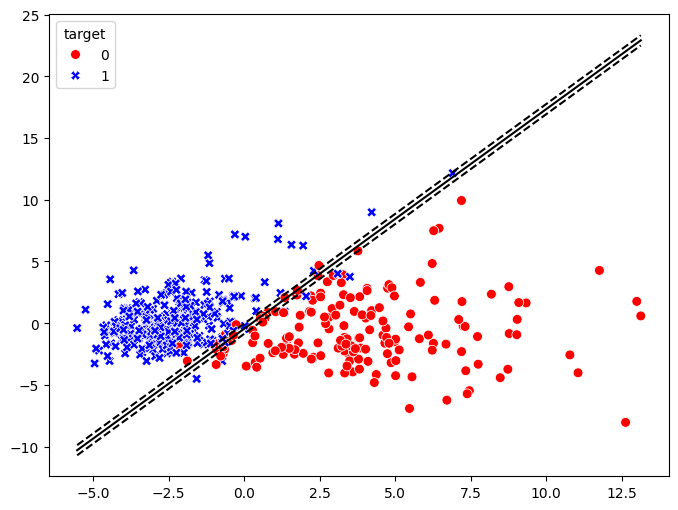

In [ ]:
# Plot data points and hyperplane
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, style=y_train, palette=['red', 'blue'], s=50)
plt.plot(x_vals, y_vals, 'k-', label="Hyperplane")  # Hyperplane
plt.plot(x_vals, y_vals_margin1, 'k--', label="Margin")  # Margin above
plt.plot(x_vals, y_vals_margin2, 'k--')  # Margin below

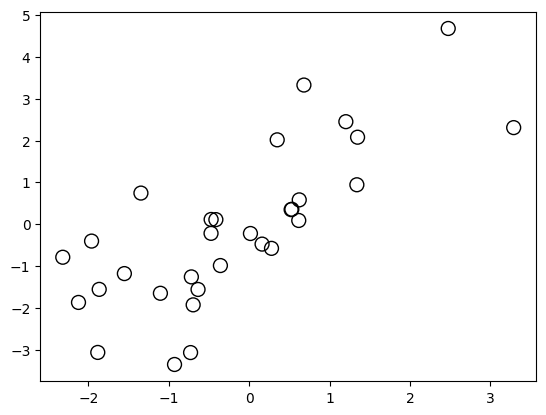

In [ ]:
# Highlight support vectors
support_vectors = X_train_pca[svm_clf.support_]
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label="Support Vectors")

<ipython-input-26-ea3b3dfdc7c5>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


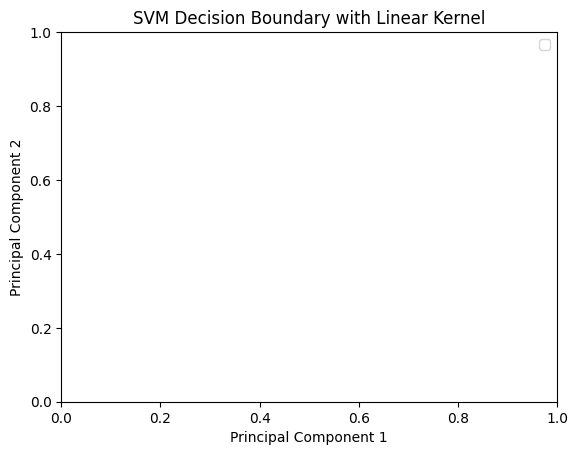

In [ ]:
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary with Linear Kernel")
plt.legend()
plt.show()

## 14.Make Predictions

In [ ]:
# Make Predictions
y_pred = svm_clf.predict(X_test_pca)

## 15.Evaluate Model

In [ ]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, svm_clf.predict_proba(X_test_pca)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)


## 16.Display Results

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9649
Precision: 0.9857
Recall: 0.9583
F1 Score: 0.9718
ROC AUC: 0.9950
Confusion Matrix:
 [[41  1]
 [ 3 69]]


## 17. Visualize Confusion Matrix

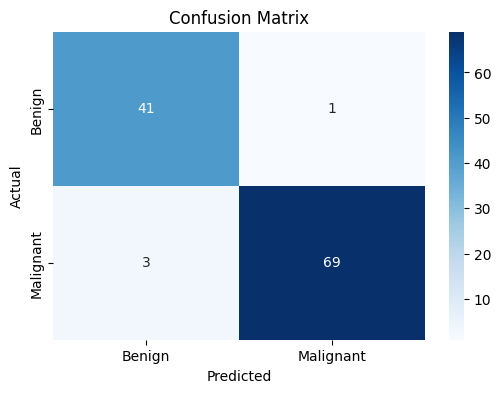

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 18.Histogram of Confusion Matrix

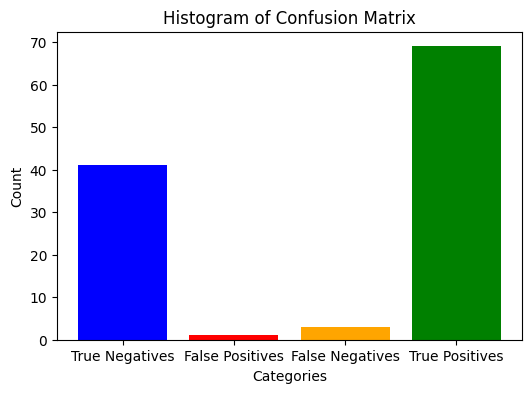

In [ ]:
# Histogram of Confusion Matrix
plt.figure(figsize=(6, 4))
plt.bar(['True Negatives', 'False Positives', 'False Negatives', 'True Positives'], conf_matrix.flatten(), color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Histogram of Confusion Matrix')
plt.show()

## 19.ROC Curve
The ROC Curve (Receiver Operating Characteristic Curve) shows how well a classification model distinguishes between classes. It provides:

✅ True Positive Rate (Sensitivity) – How many actual positives were correctly predicted.
✅ False Positive Rate – How many actual negatives were incorrectly predicted as positive.
✅ AUC (Area Under Curve) – A score between 0 and 1 indicating model performance (closer to 1 is better).

🔹 A perfect model has an AUC of 1.0 (top-left corner).
🔹 A random model has an AUC of 0.5 (diagonal line).

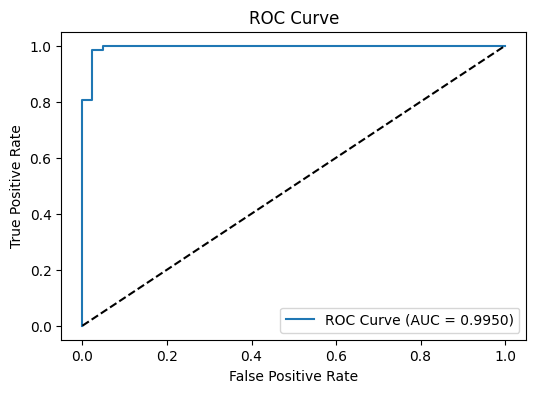

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, svm_clf.predict_proba(X_test_pca)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()